# Optimal Question Weighting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Optimizers import SampleWeighting

In [2]:
num_questions = 75
num_students = 200

q_values = np.linspace(0.1, 0.9, num_questions)
samples = np.random.binomial(1, q_values, size=(num_students, num_questions))

integration_points = np.linspace(0, 1, 401)
target_distribution = SampleWeighting.Distributions.TruncatedGaussian(0.5, 0.1, 0, 1)

### Run the Optimizers

In [3]:
optimizer = SampleWeighting.CauchySimplex(samples, integration_points, target_distribution, e=0.05)

w = np.ones(num_questions) / num_questions
for i in range(100):
    w = optimizer.search(w, gamma=1)
    
    if (i + 1) % 25 == 0:
        print(f"{i + 1}: {optimizer.f(w)}")

25: 0.00026978362153873877
50: 0.00011083024290641271
75: 5.858294681974491e-05
100: 4.3488705644284386e-05


In [4]:
optimizer = SampleWeighting.EGD(samples, integration_points, target_distribution, e=0.05)

w = np.ones(num_questions) / num_questions
for i in range(100):
    w = optimizer.search(w, step_size=10)
    
    if (i + 1) % 25 == 0:
        print(f"{i + 1}: {optimizer.f(w)}")

25: 0.00039096918635414155
50: 0.00014406533042616307
75: 6.764902685338687e-05
100: 4.5640930137250265e-05


In [5]:
optimizer = SampleWeighting.PairwiseFrankWolfe(samples, integration_points, target_distribution, e=0.05)

w = np.ones(num_questions) / num_questions
for i in range(100):
    w = optimizer.search(w)
    
    if (i + 1) % 25 == 0:
        print(f"{i + 1}: {optimizer.f(w)}")

25: 0.00098462431901682
50: 0.00014039637456376134
75: 6.545484000984586e-05
100: 3.9076161902553325e-05


### Plot the resulting distribution

In [6]:
optimizer = SampleWeighting.CauchySimplex(samples, integration_points, target_distribution, e=0.05)

w_cs = np.ones(num_questions) / num_questions
for i in range(100):
    w_cs = optimizer.search(w_cs, gamma=0.1)
    
    if (i + 1) % 25 == 0:
        print(f"{i + 1}: {optimizer.f(w_cs)}")

25: 0.0002805079055663751
50: 0.00012257093968326378
75: 6.258435006151317e-05
100: 4.245913773541789e-05


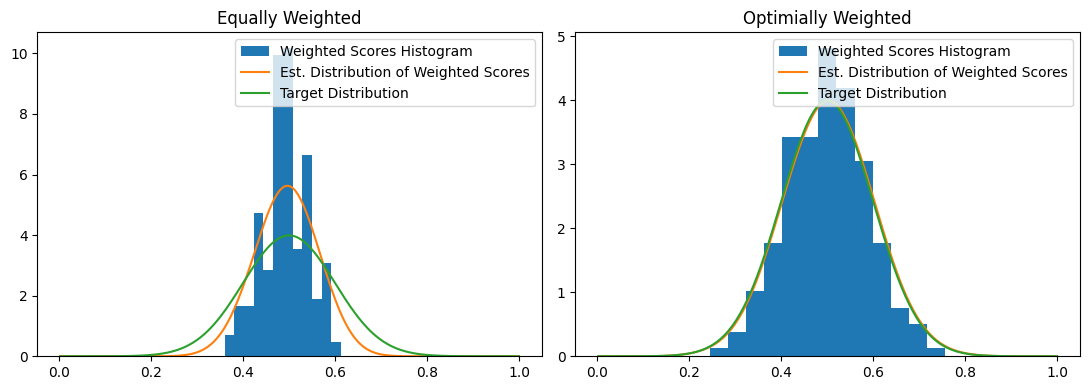

In [7]:
x_vals = integration_points[1:]

weights = [np.ones(num_questions) / num_questions, w_cs]

plt.figure(figsize=(11, 4))
for i, w in enumerate(weights):
    plt.subplot(1, 2, i + 1)
    
    student_weighted_marks = samples @ w

    plt.hist(student_weighted_marks, density=True, bins='auto', label='Weighted Scores Histogram')
    plt.plot(x_vals, optimizer.rho(w), label='Est. Distribution of Weighted Scores')
    plt.plot(x_vals, optimizer.target_distribution(x_vals), label='Target Distribution')
    
    plt.legend()
    
    if i == 0:
        plt.title("Equally Weighted")
    else:
        plt.title("Optimially Weighted")
    
plt.tight_layout();

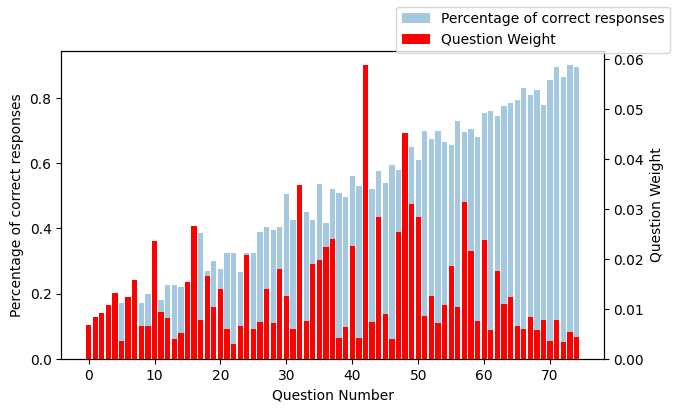

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.bar(np.arange(num_questions), np.mean(samples, axis=0), alpha=0.4, label='Percentage of correct responses')

ax2 = ax.twinx()
ax2.bar(np.arange(num_questions), w, color='red', label='Question Weight')

fig.legend()

ax.set_ylabel("Percentage of correct responses")
ax2.set_ylabel("Question Weight")

ax.set_xlabel("Question Number");